<a href="https://colab.research.google.com/github/karenQuiroga88/python_cases/blob/main/Case_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Screen Time VS Mental Healf

###Objetivo Análise: Entender como o uso diário de telas se relaciona com o bem-estar mental e impacto diretamente no nível de estresse em diferentes regimes de trabalho.

###  Investigar a relação entre o uso diário de dispositivos digitais e o bem-estar mental, examinando de que forma o tempo de tela influencia os níveis de estresse em diferentes regimes de trabalho. A análise busca identificar padrões comportamentais e possíveis correlações entre hábitos digitais e indicadores de saúde mental.


###Principais Skills Abordadas neste Case - Linguagem Python


*   Análise Exploratória de Dados (EDA): limpeza, tratamento e visualização inicial dos dados para identificar padrões e tendências.
*   Estatística Descritiva: uso de métricas como média, mediana, desvio-padrão e correlação para entender as variáveis principais.
*   Visualização de Dados: criação de gráficos e dashboards
*   Análise de Correlação: identificação de como variáveis como tempo de tela, produtividade e humor se influenciam mutuamente.


### Informações gerais do data base abaixo:

Database: Pesquisa sobre Bem-Estar Mental e Tempo de Tela.
Este conjunto de dados reúne informações de 400 participantes de uma pesquisa sobre como o uso diário de telas se relaciona com o bem-estar mental. Com a crescente presença de dispositivos digitais em nossas vidas, compreender a relação entre tempo de tela, qualidade do sono, estresse e produtividade é uma área de pesquisa fundamental para a ciência de dados, psicologia e saúde pública.

fonte: https://www.kaggle.com/datasets/adharshinikumar/screentime-vs-mentalwellness-survey-2025
Visão Geral do Conjunto de Dados
Cada linha representa um participante único e inclui:

*  Dados demográficos (idade, gênero, ocupação, estudante/trabalhador)
*  Tempo diário de tela (celular, laptop, TV, total)
*  Qualidade do sono (autoavaliação)
*  Níveis de estresse (escala de 1 a 10)
*  Pontuação de produtividade (autoavaliação)
*  Indicadores de bem-estar mental (humor, energia, foco)

### 1- Limpeza e tratamento dos dados

In [1]:
###1: Importar bibliotecas e montar acesso google drive
from google.colab import drive
from IPython.display import display
import pandas as pd
import os
import plotly.express as px

# ---- 1. Montar o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ---- 2. Caminho do arquivo
caminho = '/content/drive/MyDrive/Colab Notebooks'
arquivo = 'ScreenTimevsMentalWellness.csv'
caminhoCompleto = os.path.join(caminho,arquivo)

# ler arquivo
df = pd.read_csv(caminhoCompleto)

print(display(df.head(5)))
# print (df.columns.tolist())

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


None


In [4]:
"Verificando se extiste linhas com dados nulos por coluna"
print(df.isnull().sum())

user_id                          0
age                              0
gender                           0
occupation                       0
work_mode                        0
screen_time_hours                0
work_screen_hours                0
leisure_screen_hours             0
sleep_hours                      0
sleep_quality_1_5                0
stress_level_0_10                0
productivity_0_100               0
exercise_minutes_per_week        0
social_hours_per_week            0
mental_wellness_index_0_100      0
Unnamed: 15                    400
dtype: int64


In [5]:
# Aqui exclui a ultima coluna que estava em branco
df = df.drop(columns=['Unnamed: 15'])

df_2 = df

In [6]:
print(df.isnull().sum())

user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64


In [7]:
" Verificando se existem dados duplicados"

print(df.duplicated()) # exibindo os itens duplicados, caso exista.
print (f'numero de linhas duplicadas: {df.duplicated().sum()}')

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool
numero de linhas duplicadas: 0


##2- Salvando arquivo em csv

In [9]:
df_resultado = df.groupby(['occupation','work_mode','gender']). agg({##'user_id': 'nunique',
                                                                      'age': 'median',
                                                                      'screen_time_hours': 'median',
                                                                      'work_screen_hours': 'median',
                                                                      'leisure_screen_hours': 'median',
                                                                      'sleep_hours': 'median',
                                                                      'exercise_minutes_per_week':'median',
                                                                      'stress_level_0_10':'median',
                                                                      'productivity_0_100':'median',
                                                                      'social_hours_per_week': 'median',
                                                                      'mental_wellness_index_0_100': 'median' }).reset_index().round(0)
print (display(df_resultado.head(10)))

df_resultado = pd.DataFrame(df_resultado)

,occupation,work_mode,gender,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,exercise_minutes_per_week,stress_level_0_10,productivity_0_100,social_hours_per_week,mental_wellness_index_0_100
0,Employed,Hybrid,Female,29.0,9.0,1.0,8.0,7.0,96.0,8.0,52.0,7.0,19.0
1,Employed,Hybrid,Male,30.0,9.0,1.0,8.0,7.0,97.0,9.0,53.0,9.0,16.0
2,Employed,Hybrid,Non-binary/Other,34.0,8.0,1.0,8.0,7.0,131.0,9.0,49.0,6.0,24.0
3,Employed,In-person,Female,28.0,9.0,1.0,7.0,7.0,124.0,8.0,54.0,8.0,22.0
4,Employed,In-person,Male,25.0,8.0,1.0,7.0,7.0,90.0,7.0,56.0,9.0,17.0
5,Employed,In-person,Non-binary/Other,47.0,2.0,0.0,2.0,6.0,132.0,7.0,66.0,16.0,28.0
6,Employed,Remote,Female,30.0,9.0,4.0,6.0,7.0,100.0,9.0,48.0,8.0,9.0
7,Employed,Remote,Male,31.0,9.0,3.0,5.0,7.0,106.0,10.0,49.0,7.0,11.0
8,Retired,Hybrid,Female,24.0,5.0,1.0,4.0,7.0,134.0,7.0,69.0,13.0,30.0
9,Retired,Hybrid,Male,41.0,1.0,0.0,1.0,8.0,124.0,0.0,97.0,13.0,84.0


None


In [10]:
df_resultado.to_csv(os.path.join(caminho,'resultado_consolidado.csv'), index = False)
print('Dados salvos em csv')

df_2.to_csv(os.path.join(caminho,'raw.csv'), index = False)
print('Dados salvos em csv')

Dados salvos em csv
Dados salvos em csv


##**Lendo** e carregando os arquivos

In [11]:
# --- 1. Montar o Google Drive ---
from google.colab import drive
drive.mount('/content/drive', force_remount=False)  # não força remontagem

# --- 2. Importar bibliotecas necessárias ---
import os
import pandas as pd
# --- 2. Definir o caminho da pasta no Drive ---
pasta = '/content/drive/MyDrive/Colab Notebooks'
arquivo = 'raw.csv'
caminhoCompleto = os.path.join(pasta, arquivo)

# --- 3. Ler o CSV ---
df = pd.read_csv(caminhoCompleto)
print("✅ Dados carregados com sucesso!")
print(display(df.head(10)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dados carregados com sucesso!


,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0
5,U0006,28,Non-binary/Other,Self-employed,Hybrid,9.83,0.53,9.30,7.19,1,10.0,44.0,71,10.3,5.0
6,U0007,42,Non-binary/Other,Retired,Remote,6.02,2.82,3.20,7.44,2,6.1,64.8,141,4.7,43.7
7,U0008,36,Male,Employed,In-person,6.21,0.75,5.46,6.78,2,5.4,87.0,51,18.7,54.3
8,U0009,26,Male,Student,In-person,6.28,0.67,5.61,8.48,4,1.6,91.7,149,10.1,86.8
9,U0010,34,Male,Employed,Hybrid,9.37,0.84,8.53,7.78,2,10.0,42.2,50,12.7,10.7


None



1- Média de tempo gasto de tela por diferentes regime de trabalho
2- Distribuição das horas por tempo de atividade de tela
3- Média de tempo gasto com lazer nas telas
3- Entender se existe correlação de altos índices de stress ao uso de tela para lazer.
4- Entender de comportamento social VS a interação com o uso dos dispositivos digitais.
quebrar por atividade física
qualidade de sono


### Gráfico: Média de tempo gasto diário de tela por diferentes regimes de trabalho e ocupação

In [50]:
import plotly.io as pio
import plotly.express as px


mediaUso_tela = (
    df
    .groupby(['work_mode', 'occupation'])['screen_time_hours']
    .median()
    .reset_index()
)

# Criar gráfico
grafico01 = px.bar(
    mediaUso_tela,
    x='work_mode',
    y='screen_time_hours',
    title='Média de tempo gasto diário de tela por diferentes regimes de trabalho',
    color='occupation',
    barmode = 'group'
)

# Exibir inline
grafico01.show()

### Gráfico: Distribuição do uso de tela por modo de trabalho

In [54]:
import plotly.express as px

# Agrupamento e cálculo da mediana
distribuicao_usoTela = (
    df
    .groupby(['work_mode','occupation'])[['work_screen_hours', 'leisure_screen_hours']]
    .median()
    .reset_index()
)

# Transformar o dataframe para formato longo (para facilitar a plotagem)
distribuicao_usoTela_melt = distribuicao_usoTela.melt(
    id_vars=['work_mode', 'occupation'],
    value_vars=['work_screen_hours', 'leisure_screen_hours'],
    var_name='Tipo de uso',
    value_name='Horas por dia'
)

## print(distribuicao_usoTela_melt)

# Criar gráfico de barras empilhadas
graficoUsoTela = px.bar(
    distribuicao_usoTela_melt,
    x='occupation',
    y='Horas por dia',
    color='Tipo de uso',
    facet_col='work_mode',  # Divide as barras por ocupação
    barmode='group',  # empilha as barras
    title='Distribuição do uso de tela por ocupação e regime de trabalho',
    labels={'work_mode': 'Regime de trabalho'}
)

# 🔹 Remove o título do eixo X (“occupation”) em todos os facets
graficoUsoTela.update_xaxes(title_text='')

graficoUsoTela.show()

In [ ]:
df_saudeMental = df[df['occupation' ] == 'Employed'][[
    'user_id' ,'work_mode', 'stress_level_0_10', 'screen_time_hours', 'leisure_screen_hours'
]]

graficoSaudeMental = px.scatter (
df_saudeMental,
x='stress_level_0_10',
y='screen_time_hours',
facet_col='work_mode',
trendline='ols',
title='Nivel de Stress Por Regime de Trabalho',
range_y=[0,12]
)

graficoSaudeMental.show()

graficoSaudeMental2 = px.scatter (
df_saudeMental,
x= 'stress_level_0_10',
y=  'leisure_screen_hours',
facet_col='work_mode',
trendline='ols',
title='Nivel de Stress Por Regime de Trabalho e Horas de tela de Lazer',
range_y = [0,12]
)

graficoSaudeMental2.show()

# 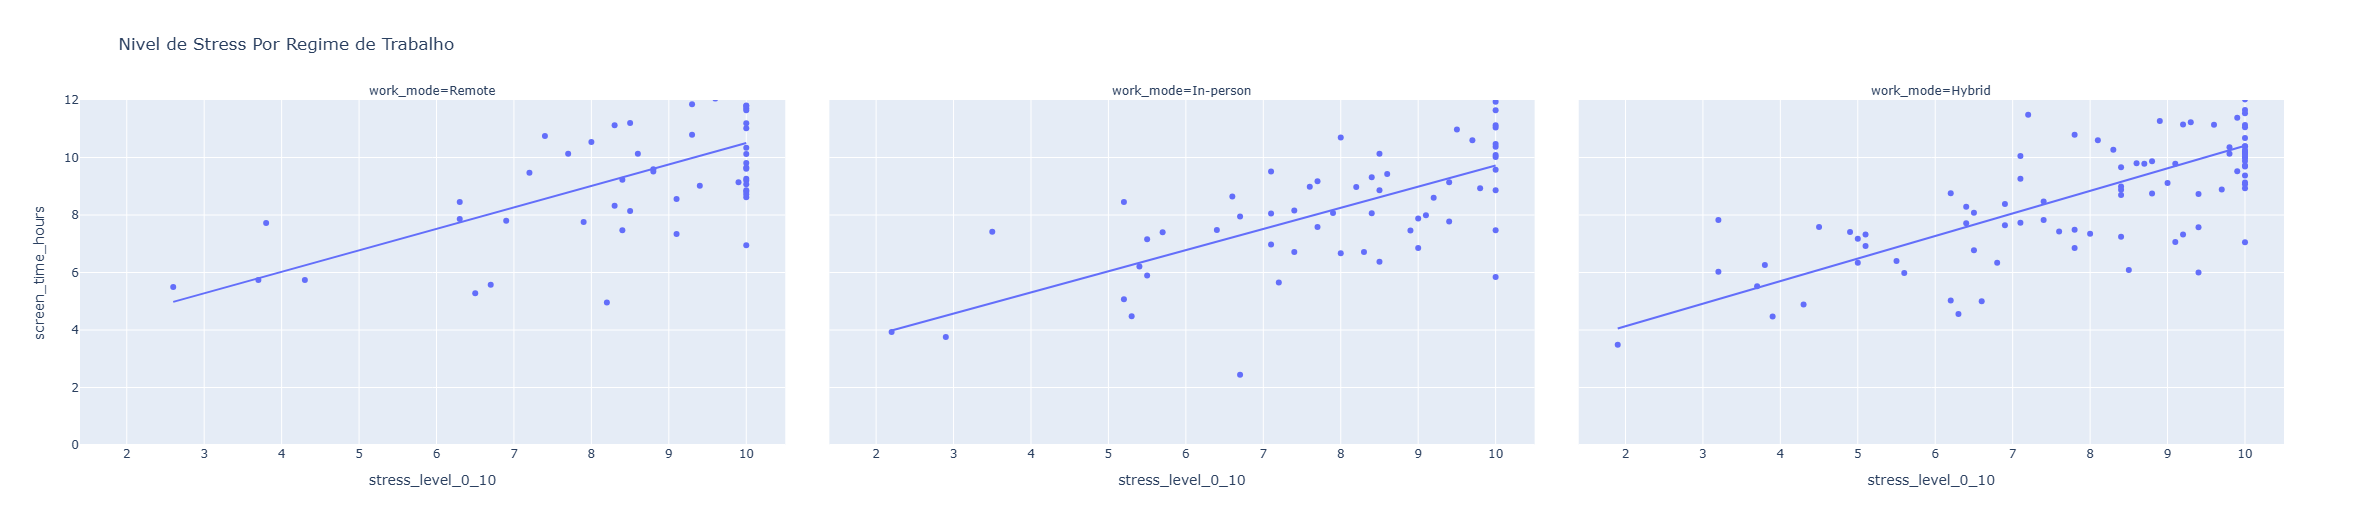:

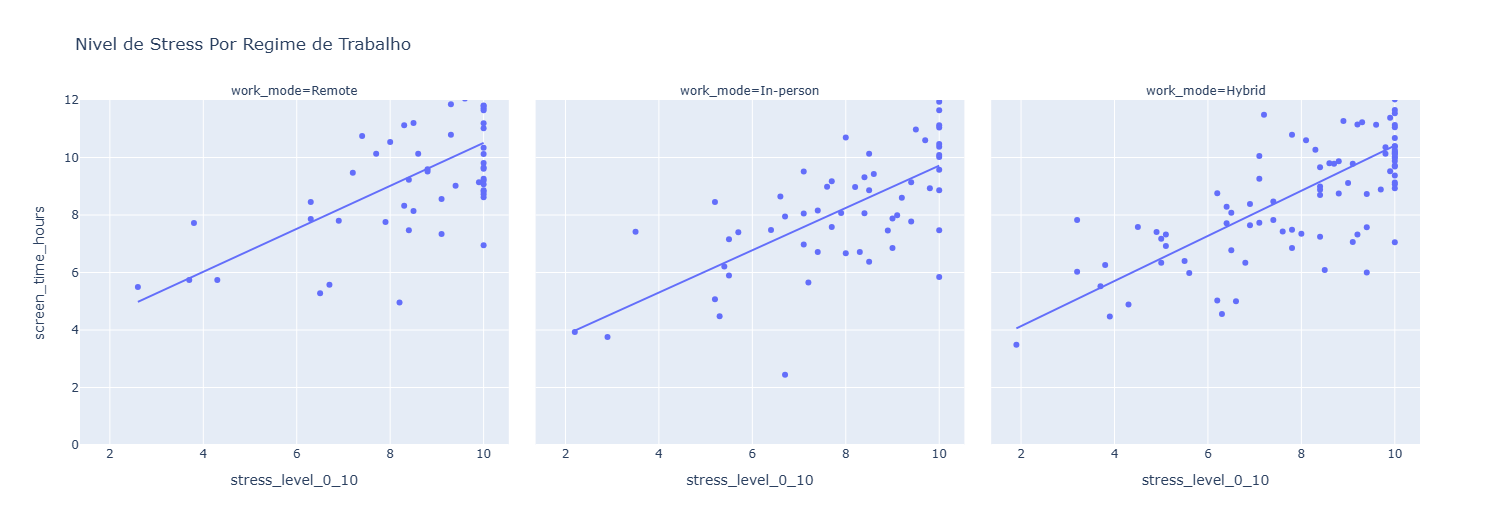